In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os,sys
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import skimage, skimage.io
import torch
import torchvision
import torchxrayvision as xrv
import dataset_utils
import pandas as pd
from tqdm.autonotebook import tqdm
import model_ptl

In [4]:
transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),
                                            xrv.datasets.XRayResizer(320)])

In [5]:
d = dataset_utils.get_data("pc", transform=transform)

['Hemidiaphragm Elevation', 'Nodule', 'Hernia', 'Cardiomegaly', 'Pneumonia', 'Emphysema', 'Infiltration', 'Pleural_Thickening', 'Air Trapping', 'Bronchiectasis', 'Scoliosis', 'Costophrenic Angle Blunting', 'Effusion', 'Mass', 'Consolidation', 'Flattened Diaphragm', 'Granuloma', 'Hilar Enlargement', 'Atelectasis', 'Fibrosis', 'Tube', 'Aortic Atheromatosis', 'Aortic Elongation', 'Support Devices', 'Pneumothorax', 'Tuberculosis', 'Edema', 'Fracture']


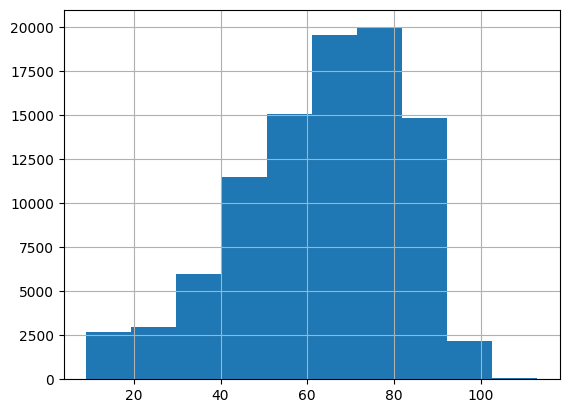

In [6]:
d.csv.age_years.hist();

In [7]:
model = xrv.baseline_models.riken.AgeModel()

In [26]:
d = dataset_utils.get_data("pc", transform=transform)
ds = xrv.datasets.SubsetDataset(d, range(500))
preds = xrv.utils.infer(model, ds)

['Hemidiaphragm Elevation', 'Nodule', 'Hernia', 'Cardiomegaly', 'Pneumonia', 'Emphysema', 'Infiltration', 'Pleural_Thickening', 'Air Trapping', 'Bronchiectasis', 'Scoliosis', 'Costophrenic Angle Blunting', 'Effusion', 'Mass', 'Consolidation', 'Flattened Diaphragm', 'Granuloma', 'Hilar Enlargement', 'Atelectasis', 'Fibrosis', 'Tube', 'Aortic Atheromatosis', 'Aortic Elongation', 'Support Devices', 'Pneumothorax', 'Tuberculosis', 'Edema', 'Fracture']


  0%|          | 0/125 [00:00<?, ?it/s]

In [36]:
np.abs((ds.csv.age_years - preds.flatten())).mean()

6.039689092636109

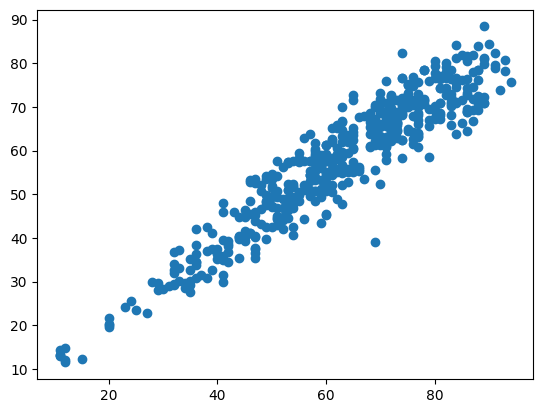

In [34]:
plt.scatter(ds.csv.age_years, preds);

In [37]:
d = dataset_utils.get_data("chex", transform=transform)
ds = xrv.datasets.SubsetDataset(d, range(500))
preds = xrv.utils.infer(model, ds)

['Lung Lesion', 'Pneumonia', 'Effusion', 'Support Devices', 'Pneumothorax', 'Consolidation', 'Cardiomegaly', 'Edema', 'Lung Opacity', 'Enlarged Cardiomediastinum', 'Fracture', 'Atelectasis', 'Pleural Other']


  0%|          | 0/125 [00:00<?, ?it/s]

In [38]:
np.abs((ds.csv.age_years - preds.flatten())).mean()

8.724584911346435

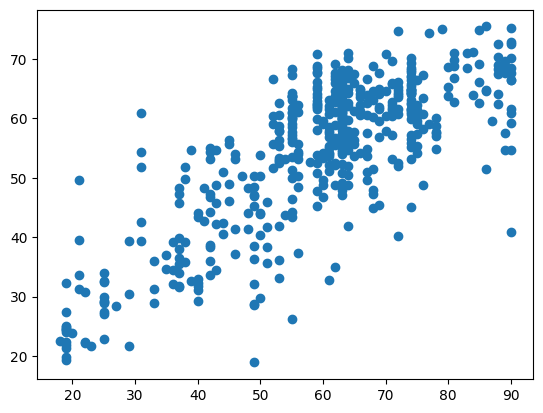

In [39]:
plt.scatter(ds.csv.age_years, preds);

In [40]:
d = dataset_utils.get_data("nih", transform=transform)
ds = xrv.datasets.SubsetDataset(d, range(500))
preds = xrv.utils.infer(model, ds)

['Fibrosis', 'Pneumonia', 'Nodule', 'Effusion', 'Pneumothorax', 'Hernia', 'Mass', 'Consolidation', 'Emphysema', 'Infiltration', 'Cardiomegaly', 'Edema', 'Pleural_Thickening', 'Atelectasis']


  0%|          | 0/125 [00:00<?, ?it/s]

In [41]:
np.abs((ds.csv.age_years - preds.flatten())).mean()

3.5206049575805665

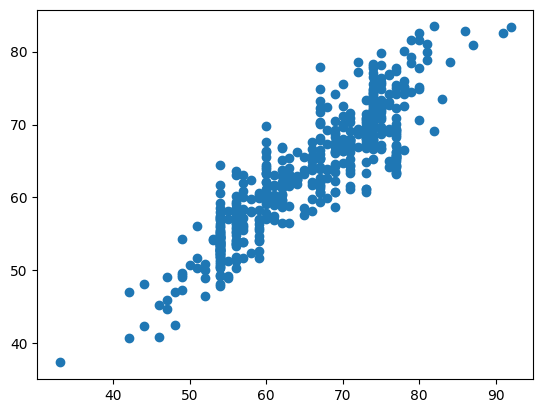

In [42]:
plt.scatter(ds.csv.age_years, preds);